# Import the Neccesary Libraries #

In [860]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeClassifier, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# import ace_tools as tools
from pprint import pprint
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel


import warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [861]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE



In [862]:
# Load the dataset
data = pd.read_csv('/Users/apple/Desktop/DATA SCIENCE PROJECT PREPARARTION /DATA/StudentPerformanceFactors (1).csv')
(data.head(10))


Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   
5                        Yes            8               89           Medium   
6                        Yes            7               68              Low   
7                        Yes            6               50           Medium   
8                         No            6               80             High   
9                        Yes            8               71           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   
5             Yes                  3        Medium          Medium   
6             Yes                  1           Low          Medium   
7             Yes                  1          High            High   
8             Yes                  0        Medium             Low   
9             Yes                  0          High            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   
5      Public       Positive                  3                    No   
6     Private        Neutral                  2                    No   
7      Public       Negative                  2                    No   
8     Private        Neutral                  1                    No   
9      Public       Positive                  5                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70  
5             Postgraduate               Near    Male          71  
6              High School           Moderate    Male          67  
7              High School                Far    Male          66  
8                  College               Near    Male          69  
9              High School           Moderate    Male          72

# EXPLORATORY DATA ANALYSIS AND DATA PREPROCESSING #

In [864]:
# Check the dimensions (rows, columns) of the dataset
data.shape

(6607, 20)

In [865]:
# Overview of the Dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [866]:
print(data.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [867]:
# Separate categorical and numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Printing the number of columns and each column in segments
print('=== NUMERICAL COLUMNS ===')
print(f"Number of numerical columns: {len(numerical_cols)}")
print("Numerical Columns:")
for col in numerical_cols:
    print(f"- {col}")

print('\n')

print('=== CATEGORICAL COLUMNS ===')
print(f"Number of categorical columns: {len(categorical_cols)}")
print("Categorical Columns:")
for col in categorical_cols:
    print(f"- {col}")


=== NUMERICAL COLUMNS ===
Number of numerical columns: 7
Numerical Columns:
- Hours_Studied
- Attendance
- Sleep_Hours
- Previous_Scores
- Tutoring_Sessions
- Physical_Activity
- Exam_Score


=== CATEGORICAL COLUMNS ===
Number of categorical columns: 13
Categorical Columns:
- Parental_Involvement
- Access_to_Resources
- Extracurricular_Activities
- Motivation_Level
- Internet_Access
- Family_Income
- Teacher_Quality
- School_Type
- Peer_Influence
- Learning_Disabilities
- Parental_Education_Level
- Distance_from_Home
- Gender


In [868]:
# Checking for missing Values
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [869]:
# Descriptive Statistical Summary for Numerical column
data.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [870]:
# Descriptive statistics for categorical columns
data.describe(include='object')

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6607                6607                       6607   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3319                       3938   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6607            6607          6607            6529   
unique                3               2             3               3   
top              Medium             Yes           Low          Medium   
freq               3351            6108          2672            3925   

       School_Type Peer_Influence Learning_Disabilities  \
count         6607           6607                  6607   
unique           2              3                     2   
top         Public       Positive                    No   
freq          4598           2638                  5912   

       Parental_Education_Level Distance_from_Home Gender  
count                      6517               6540   6607  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3223               3884   3814

In [871]:
# Imputation for numerical data (using mean)
num_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# Imputation for categorical data (using most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

In [872]:
# Checking for missing Values after preprocessing 
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [873]:
# Cap the score at 100
data['Exam_Score'] = data['Exam_Score'].apply(lambda x: min(x, 100))

In [874]:
# The number of duplicate rows in the DataFrame.
data.duplicated().sum()

0

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


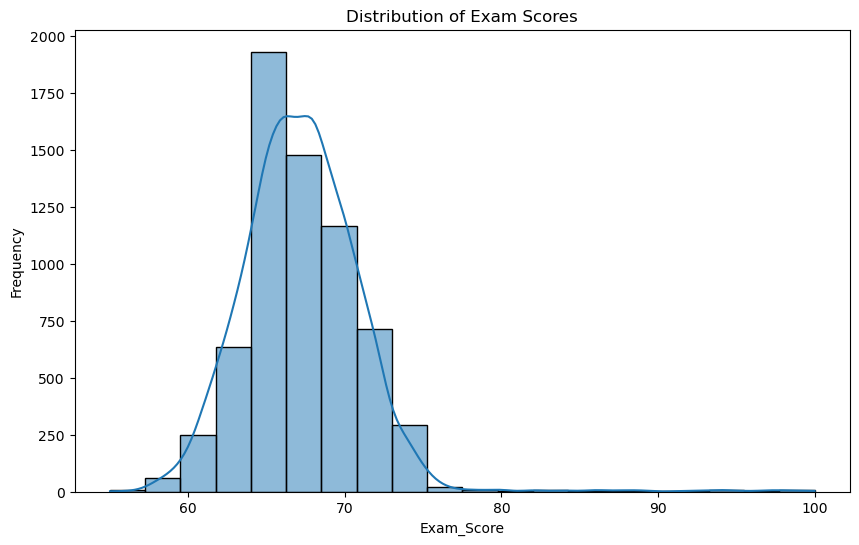

In [875]:
# Plotting the distribution of Exam Score
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], kde=True, bins=20)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam_Score')
plt.ylabel('Frequency')
plt.show()


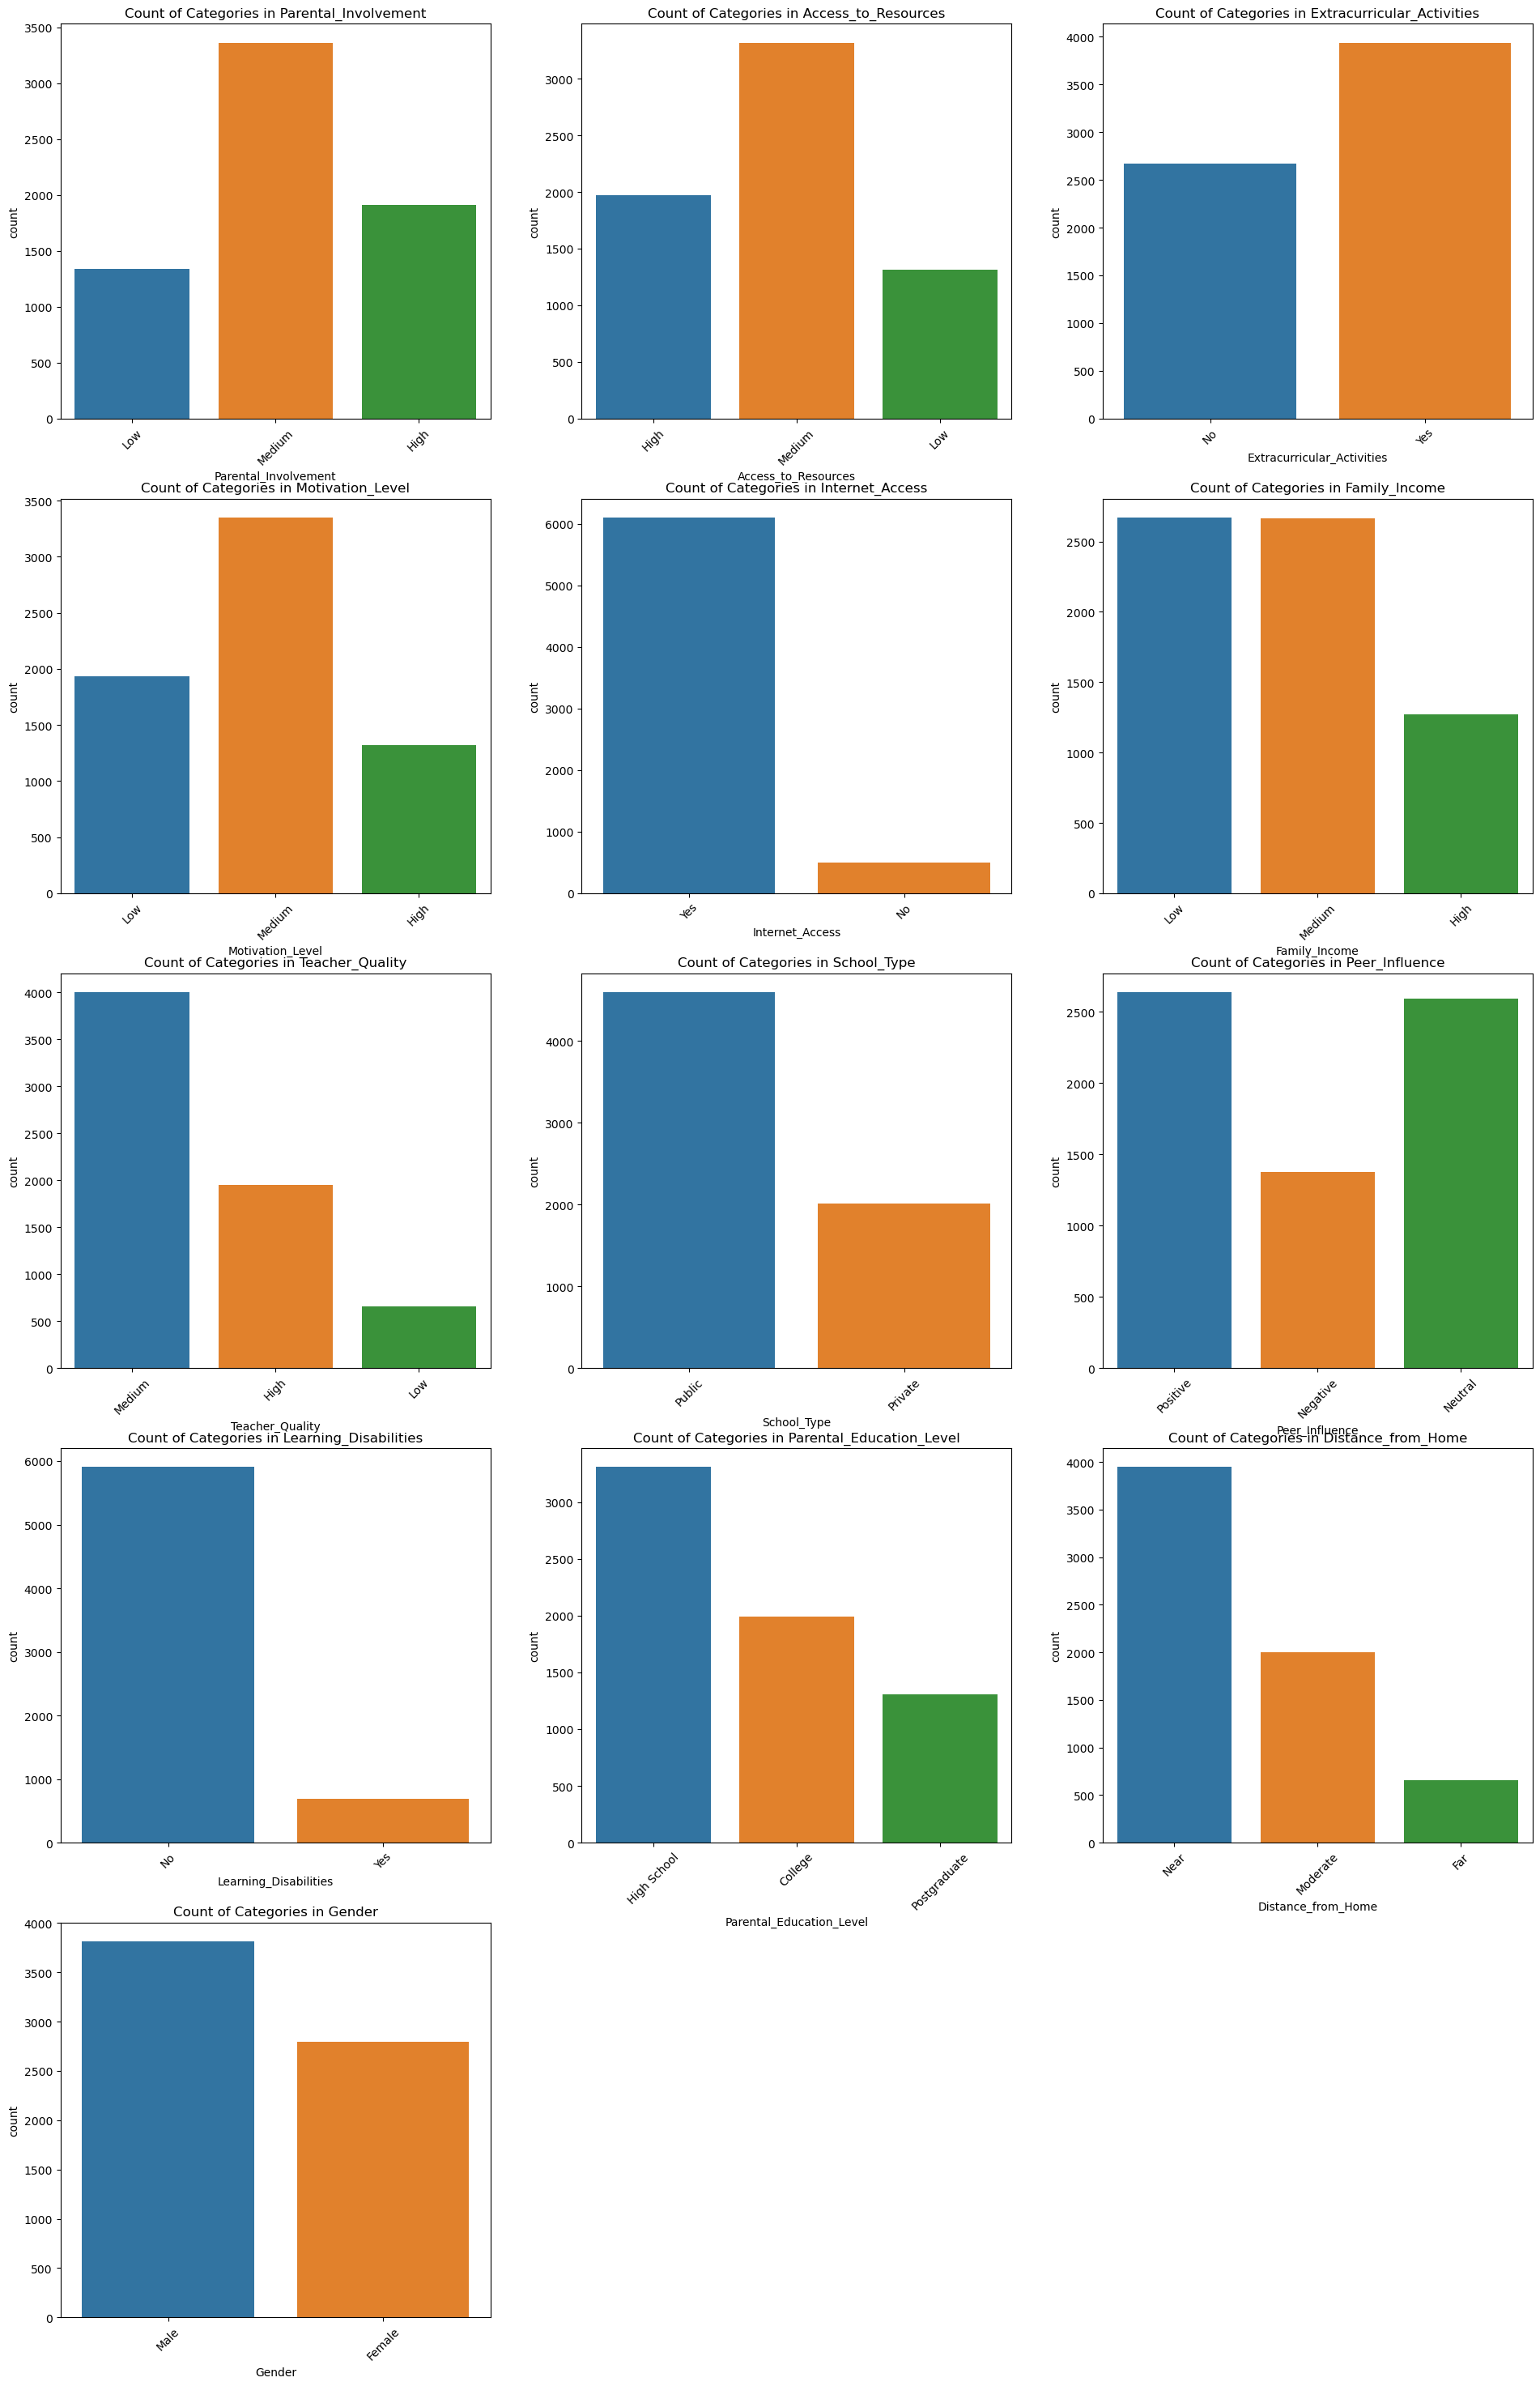

In [876]:
# Visualization of the Categorical Variable
# Define number of columns per row and calculate number of rows needed
n_cols = 3
n_rows = len(categorical_cols) // n_cols + int(len(categorical_cols) % n_cols != 0)

# Set the figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
fig.tight_layout(pad=5.0)

# Flatten axes for easy iteration (handles both single and multiple rows)
axes = axes.flatten()

# Loop through categorical columns and plot them
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Count of Categories in {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any extra subplots if categorical_columns is not a multiple of n_cols
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

# Display the plots
plt.show()

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


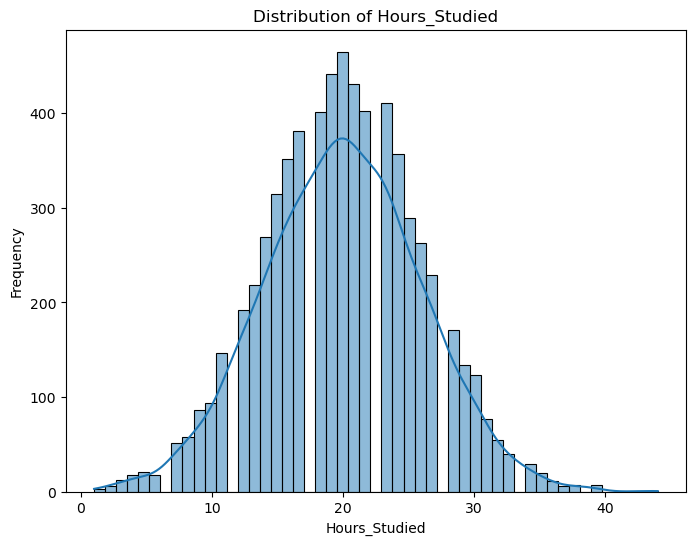

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


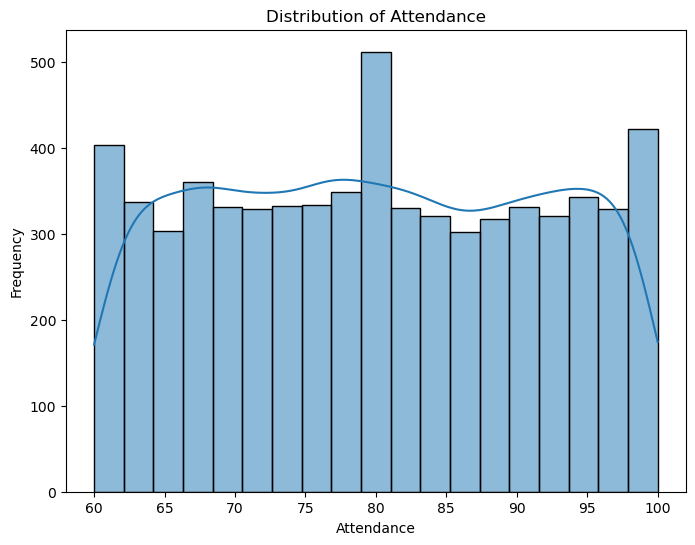

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


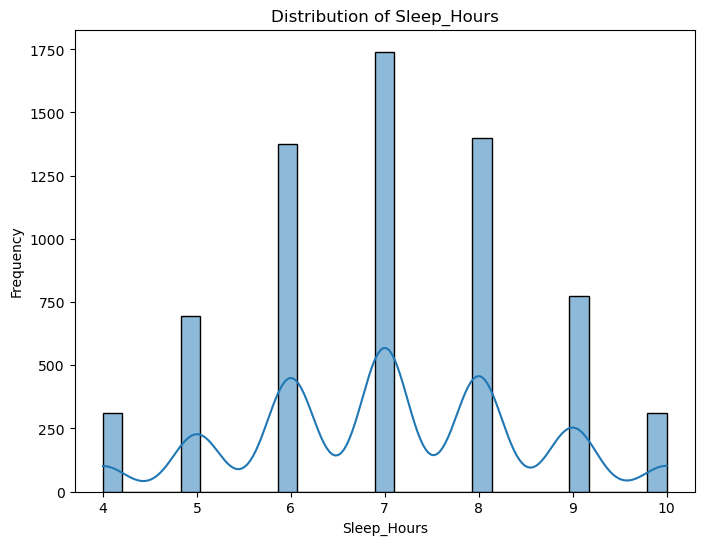

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


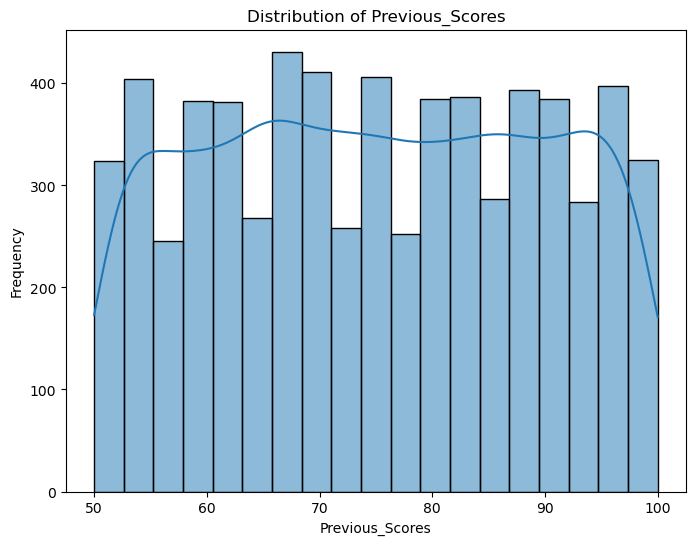

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


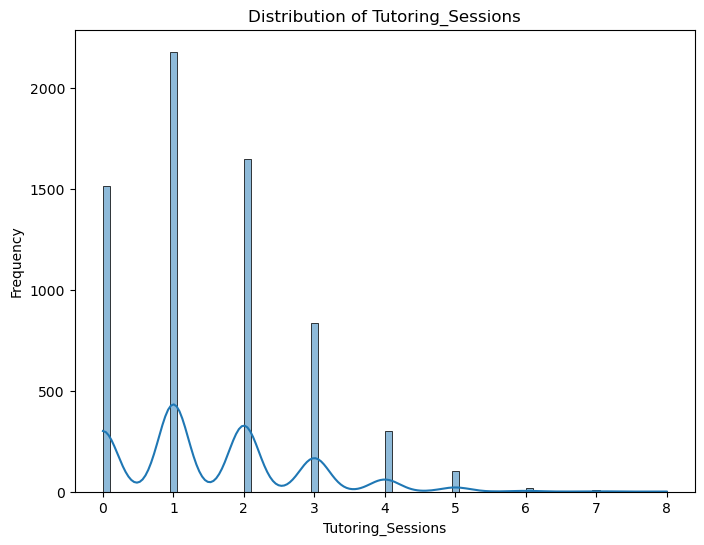

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


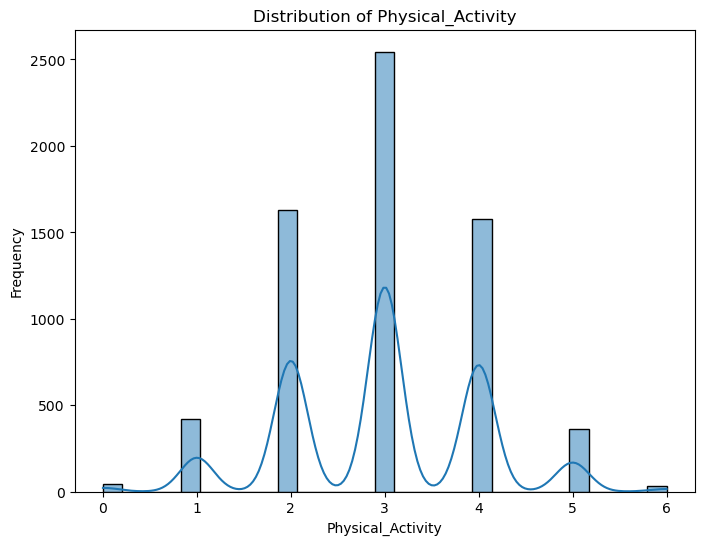

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


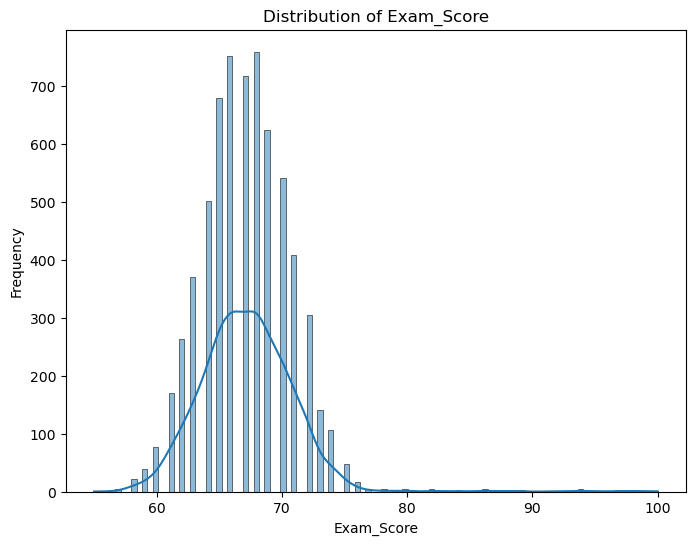

In [877]:
# Visualization of Numerical Variables 
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

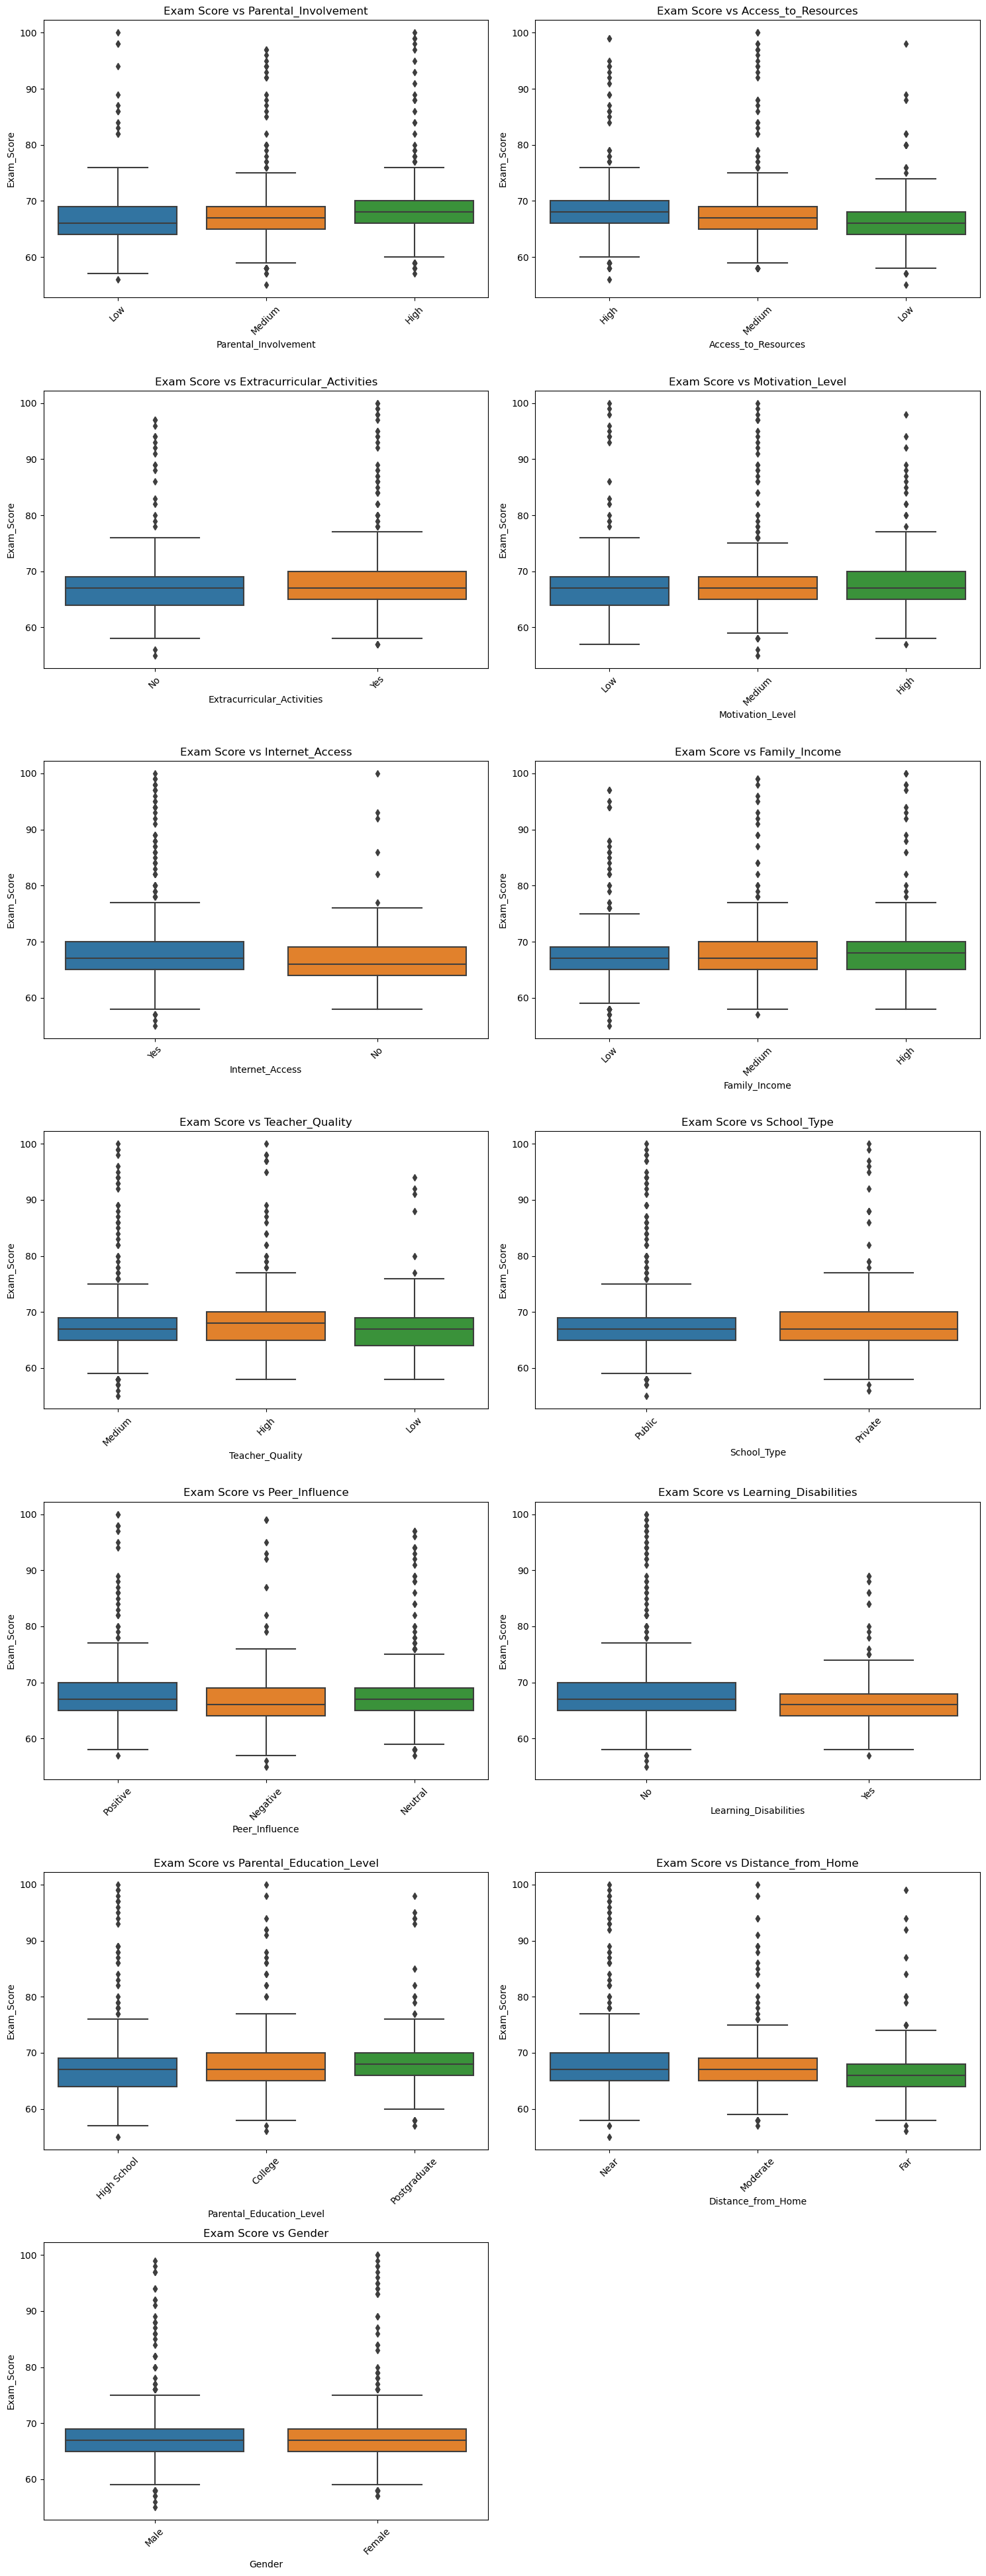

In [878]:
# Boxplot of Exam Score vs Categorical Variables
fig, axes = plt.subplots(nrows=(len(categorical_cols) + 1) // 2, ncols=2, figsize=(15, len(categorical_cols) * 3))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=data, x=col, y='Exam_Score', ax=axes[i])
    axes[i].set_title(f'Exam Score vs {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots if the number of categorical_cols is odd
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

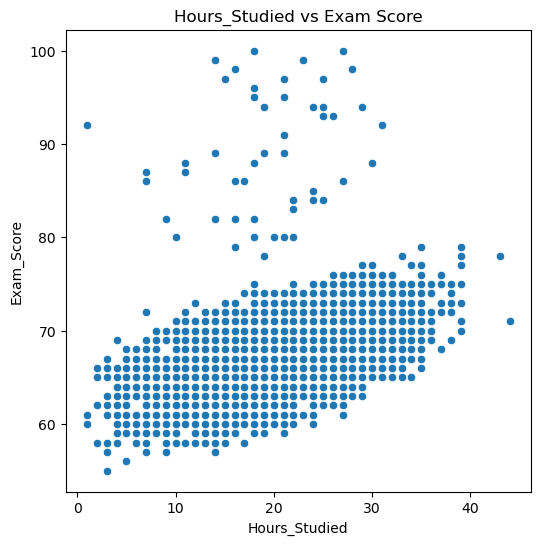

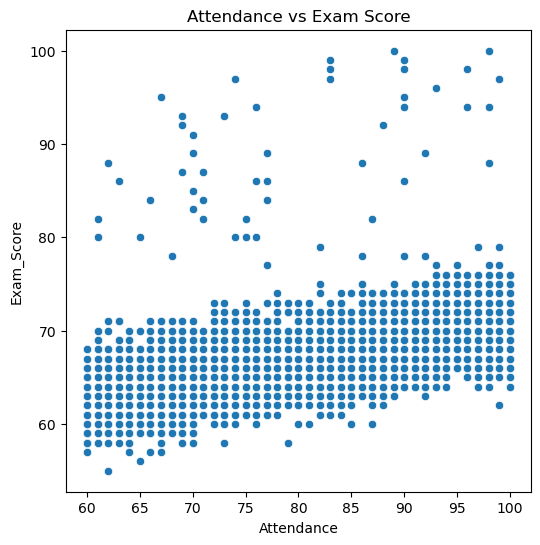

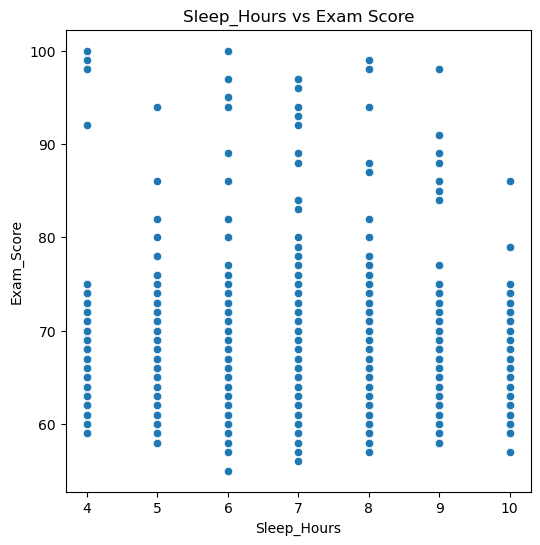

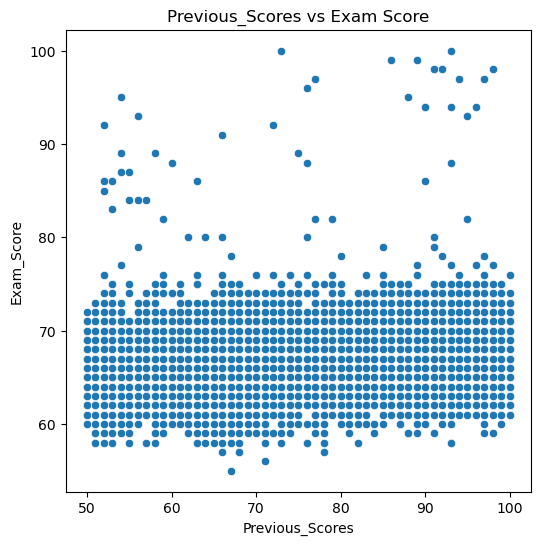

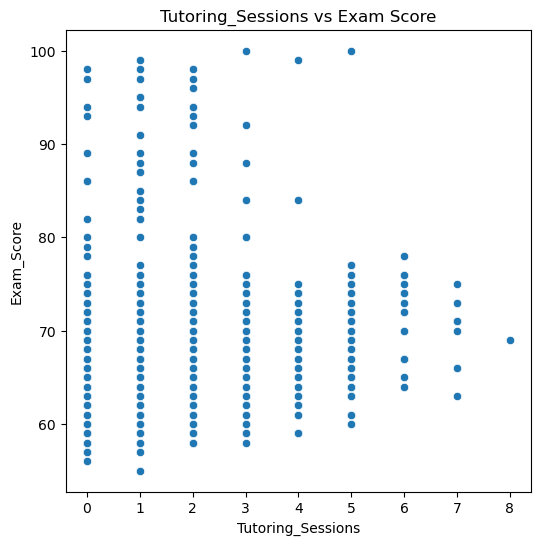

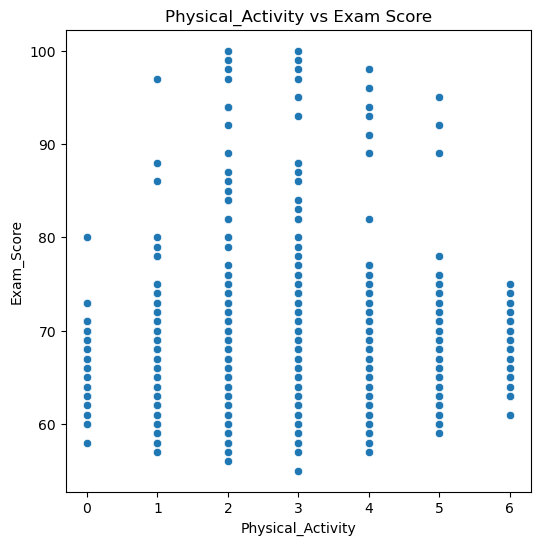

In [879]:
# Scatter plot for numerical variables vs Exam Score
for col in numerical_cols:
    if col != 'Exam_Score':
        plt.figure(figsize=(6, 6))
        sns.scatterplot(data=data, x=col, y='Exam_Score')
        plt.title(f'{col} vs Exam Score')
        plt.xlabel(col)
        plt.ylabel('Exam_Score')
        plt.show()


In [880]:
#Transforming categorical variables to numerical variables
# Loop through all columns and encode them
for column in data.columns:
    # If the column type is object or contains fewer unique values (categorical-like)
    if data[column].dtype == 'object' or data[column].nunique() < 10:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        
(data.head(10))

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0           23.0        84.0                     1                    0   
1           19.0        64.0                     1                    2   
2           24.0        98.0                     2                    2   
3           29.0        89.0                     1                    2   
4           19.0        92.0                     2                    2   
5           19.0        88.0                     2                    2   
6           29.0        84.0                     2                    1   
7           25.0        78.0                     1                    0   
8           17.0        94.0                     2                    0   
9           23.0        98.0                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            3             73.0                 1   
1                           0            4             59.0                 1   
2                           1            3             91.0                 2   
3                           1            4             98.0                 2   
4                           1            2             65.0                 2   
5                           1            4             89.0                 2   
6                           1            3             68.0                 1   
7                           1            2             50.0                 2   
8                           0            2             80.0                 0   
9                           1            4             71.0                 2   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1                  0              1                2   
1                1                  2              2                2   
2                1                  2              2                2   
3                1                  1              2                2   
4                1                  3              2                0   
5                1                  3              2                2   
6                1                  1              1                2   
7                1                  1              0                0   
8                1                  0              2                1   
9                1                  0              0                0   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            1               2                  3                      0   
1            1               0                  4                      0   
2            1               1                  4                      0   
3            1               0                  4                      0   
4            1               1                  4                      0   
5            1               2                  3                      0   
6            0               1                  2                      0   
7            1               0                  2                      0   
8            0               1                  1                      0   
9            1               2                  5                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         1                   2       1        67.0  
1                         0                   1       0        61.0  
2                         2                   2       1        74.0  
3                         1                   1       1        71.0  
4                         0                   2       0        70.0  
5                         2                   2       1        71.0  
6                         1                   1       1        67.0  
7                         1                   0       1        66.0  
8             

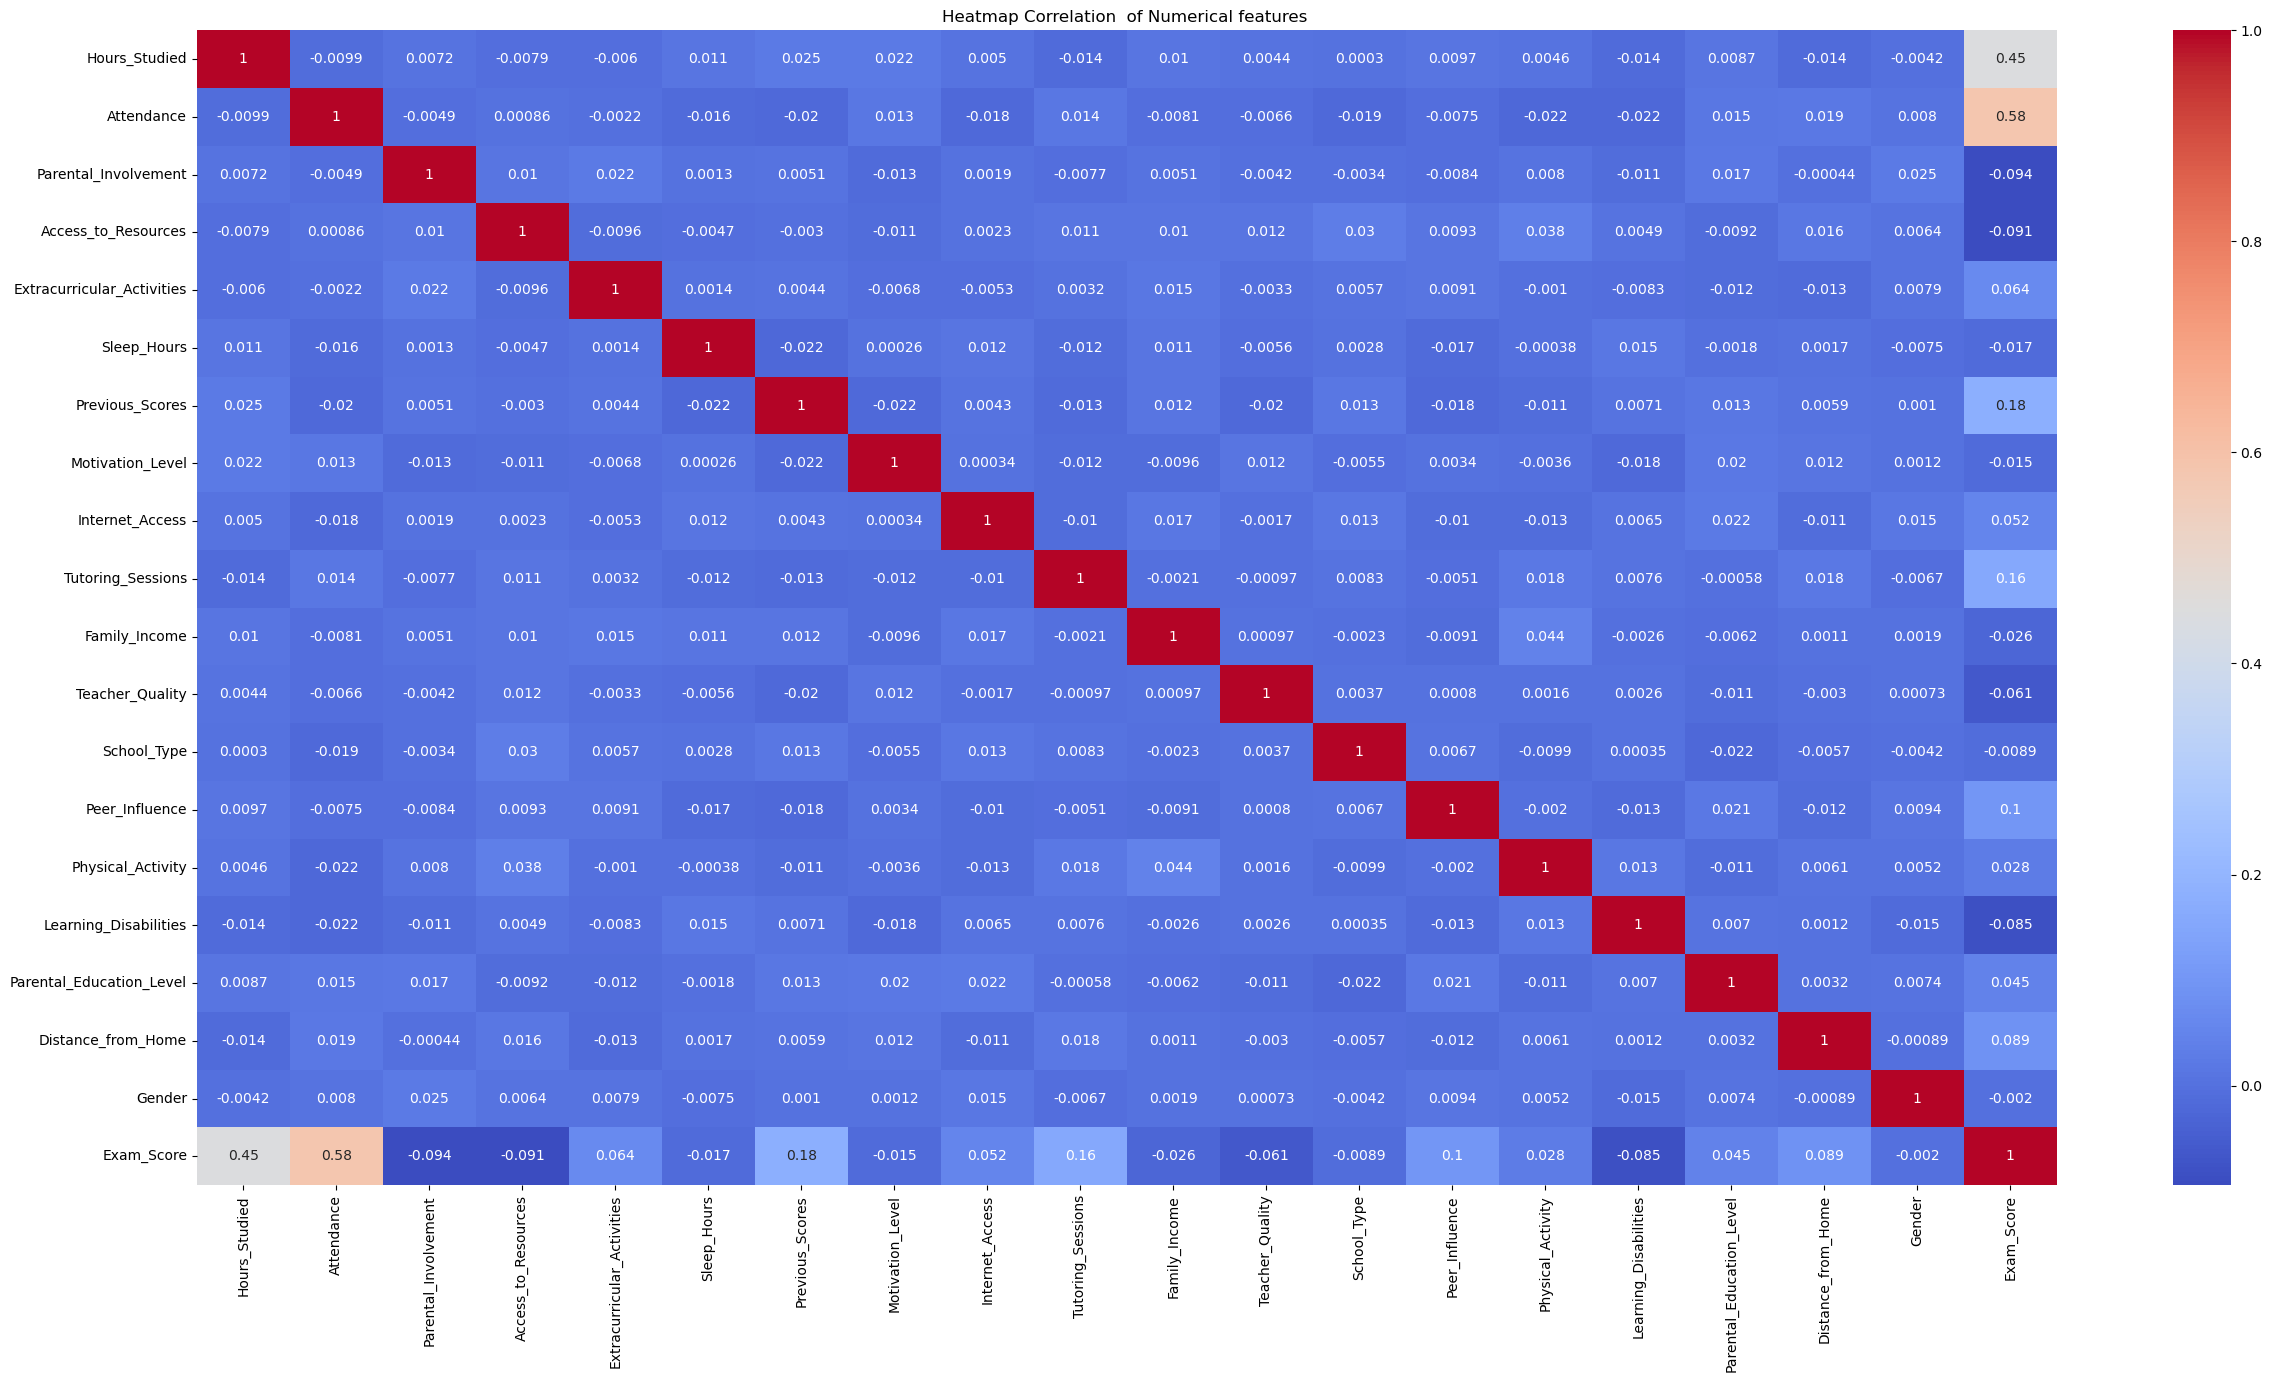

In [881]:
# Display the Heatmap correlation 
plt.figure(figsize=(30, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation  of Numerical features ')
plt.show()

In [882]:
# Classify the Exam Scores in Specific Range
def classify_score(x):
    if x < 50:
        return 'fail'
    elif 50 <= x <= 59:
        return 'credit'
    elif 60 <= x <= 69:
        return 'merit'
    else:
        return 'distinction'

data['Exam_Score'] = data['Exam_Score'].apply(classify_score)
data.head(10)

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0           23.0        84.0                     1                    0   
1           19.0        64.0                     1                    2   
2           24.0        98.0                     2                    2   
3           29.0        89.0                     1                    2   
4           19.0        92.0                     2                    2   
5           19.0        88.0                     2                    2   
6           29.0        84.0                     2                    1   
7           25.0        78.0                     1                    0   
8           17.0        94.0                     2                    0   
9           23.0        98.0                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            3             73.0                 1   
1                           0            4             59.0                 1   
2                           1            3             91.0                 2   
3                           1            4             98.0                 2   
4                           1            2             65.0                 2   
5                           1            4             89.0                 2   
6                           1            3             68.0                 1   
7                           1            2             50.0                 2   
8                           0            2             80.0                 0   
9                           1            4             71.0                 2   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                1                  0              1                2   
1                1                  2              2                2   
2                1                  2              2                2   
3                1                  1              2                2   
4                1                  3              2                0   
5                1                  3              2                2   
6                1                  1              1                2   
7                1                  1              0                0   
8                1                  0              2                1   
9                1                  0              0                0   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            1               2                  3                      0   
1            1               0                  4                      0   
2            1               1                  4                      0   
3            1               0                  4                      0   
4            1               1                  4                      0   
5            1               2                  3                      0   
6            0               1                  2                      0   
7            1               0                  2                      0   
8            0               1                  1                      0   
9            1               2                  5                      0   

   Parental_Education_Level  Distance_from_Home  Gender   Exam_Score  
0                         1                   2       1        merit  
1                         0                   1       0        merit  
2                         2                   2       1  distinction  
3                         1                   1       1  distinction  
4                         0                   2       0  distinction  
5                         2                   2       1  distinction  
6                         1                   1       1        merit  
7                         1                   0       1        merit  
8    

In [883]:
# Rename the 'Exam_Score' column to 'Grade'
data.rename(columns={'Exam_Score': 'Grade'}, inplace=True)

# Display the updated DataFrame
data

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0              23.0        84.0                     1                    0   
1              19.0        64.0                     1                    2   
2              24.0        98.0                     2                    2   
3              29.0        89.0                     1                    2   
4              19.0        92.0                     2                    2   
...             ...         ...                   ...                  ...   
6602           25.0        69.0                     0                    2   
6603           23.0        76.0                     0                    2   
6604           20.0        90.0                     2                    1   
6605           10.0        86.0                     0                    0   
6606           15.0        67.0                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                              0            3             73.0   
1                              0            4             59.0   
2                              1            3             91.0   
3                              1            4             98.0   
4                              1            2             65.0   
...                          ...          ...              ...   
6602                           0            3             76.0   
6603                           0            4             81.0   
6604                           1            2             65.0   
6605                           1            2             91.0   
6606                           1            5             94.0   

      Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
0                    1                1                  0              1   
1                    1                1                  2              2   
2                    2                1                  2              2   
3                    2                1                  1              2   
4                    2                1                  3              2   
...                ...              ...                ...            ...   
6602                 2                1                  1              0   
6603                 2                1                  3              1   
6604                 1                1                  3              1   
6605                 0                1                  2              1   
6606                 2                1                  0              2   

      Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
0                   2            1               2                  3   
1                   2            1               0                  4   
2                   2            1               1                  4   
3                   2            1               0                  4   
4                   0            1               1                  4   
...               ...          ...             ...                ...   
6602                2            1               2                  2   
6603                0            1               2                  2   
6604                2            1               0                  2   
6605                2            0               2                  3   
6606                2            1               2                  4   

      Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
0                         0                         1                   2   
1                         0                         0                   1   
2                         0                         2                   2   
3                         0                         1                   1   
4                         0                         0                   2   
...         

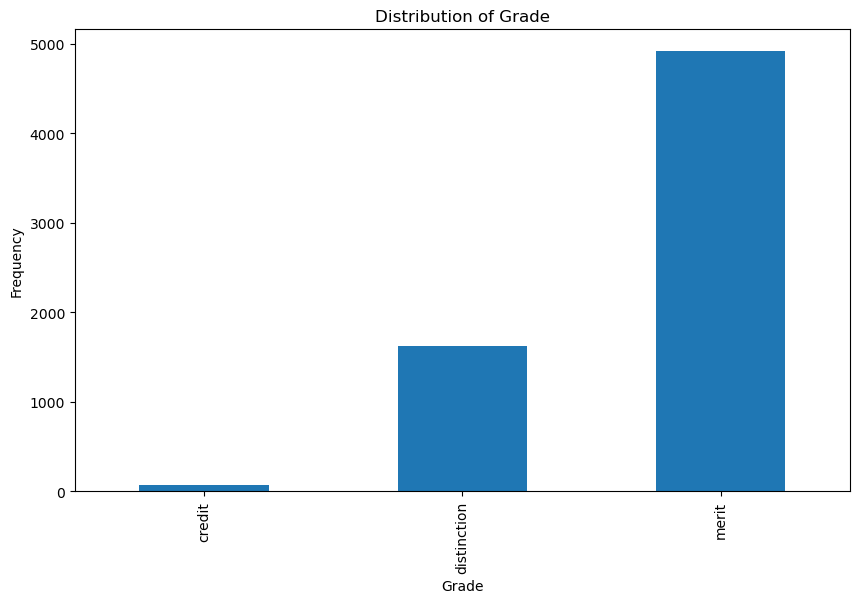

In [884]:
# Visualizing the 'Exam_Score' column in a bar chart
plt.figure(figsize=(10, 6))
data['Grade'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Grade')
plt.show()

In [885]:
# Replacing the values in 'Grade' with Grade Mapping
grade_mapping = {
    'credit': 0,
    'merit': 1,
    'distinction': 2
}
data['Grade'] = data['Grade'].replace(grade_mapping)
print(data)

      Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0              23.0        84.0                     1                    0   
1              19.0        64.0                     1                    2   
2              24.0        98.0                     2                    2   
3              29.0        89.0                     1                    2   
4              19.0        92.0                     2                    2   
...             ...         ...                   ...                  ...   
6602           25.0        69.0                     0                    2   
6603           23.0        76.0                     0                    2   
6604           20.0        90.0                     2                    1   
6605           10.0        86.0                     0                    0   
6606           15.0        67.0                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores 

In [886]:
# Separate features and target
X = data.drop('Grade', axis=1)
y = data['Grade']

X

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0              23.0        84.0                     1                    0   
1              19.0        64.0                     1                    2   
2              24.0        98.0                     2                    2   
3              29.0        89.0                     1                    2   
4              19.0        92.0                     2                    2   
...             ...         ...                   ...                  ...   
6602           25.0        69.0                     0                    2   
6603           23.0        76.0                     0                    2   
6604           20.0        90.0                     2                    1   
6605           10.0        86.0                     0                    0   
6606           15.0        67.0                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                              0            3             73.0   
1                              0            4             59.0   
2                              1            3             91.0   
3                              1            4             98.0   
4                              1            2             65.0   
...                          ...          ...              ...   
6602                           0            3             76.0   
6603                           0            4             81.0   
6604                           1            2             65.0   
6605                           1            2             91.0   
6606                           1            5             94.0   

      Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
0                    1                1                  0              1   
1                    1                1                  2              2   
2                    2                1                  2              2   
3                    2                1                  1              2   
4                    2                1                  3              2   
...                ...              ...                ...            ...   
6602                 2                1                  1              0   
6603                 2                1                  3              1   
6604                 1                1                  3              1   
6605                 0                1                  2              1   
6606                 2                1                  0              2   

      Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
0                   2            1               2                  3   
1                   2            1               0                  4   
2                   2            1               1                  4   
3                   2            1               0                  4   
4                   0            1               1                  4   
...               ...          ...             ...                ...   
6602                2            1               2                  2   
6603                0            1               2                  2   
6604                2            1               0                  2   
6605                2            0               2                  3   
6606                2            1               2                  4   

      Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
0                         0                         1                   2   
1                         0                         0                   1   
2                         0                         2                   2   
3                         0                         1                   1   
4                         0                         0                   2   
...         

In [887]:
y

0       1
1       1
2       2
3       2
4       2
       ..
6602    1
6603    1
6604    1
6605    1
6606    1
Name: Grade, Length: 6607, dtype: int64

## Feature Scaling ##

In [889]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(data.columns[-1], axis=1))
data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data[data.columns[-1]] = data[data.columns[-1]]

In [890]:
data.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0       0.504942    0.348375             -0.254249            -1.380517   
1      -0.162822   -1.383736             -0.254249             0.913804   
2       0.671882    1.560853              0.901062             0.913804   
3       1.506587    0.781403             -0.254249             0.913804   
4      -0.162822    1.041220              0.901062             0.913804   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                   -1.214685    -0.019796        -0.143800         -0.393061   
1                   -1.214685     0.661399        -1.116110         -0.393061   
2                    0.823259    -0.019796         1.106313          0.884966   
3                    0.823259     0.661399         1.592469          0.884966   
4                    0.823259    -0.700990        -0.699406          0.884966   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0         0.285825          -1.213934      -0.284883         0.768332   
1         0.285825           0.411451       1.062448         0.768332   
2         0.285825           0.411451       1.062448         0.768332   
3         0.285825          -0.401242       1.062448         0.768332   
4         0.285825           1.224144       1.062448        -1.462550   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0     0.661006        1.070550           0.031411              -0.342867   
1     0.661006       -1.575587           1.001199              -0.342867   
2     0.661006       -0.252518           1.001199              -0.342867   
3     0.661006       -1.575587           1.001199              -0.342867   
4     0.661006       -0.252518           1.001199              -0.342867   

   Parental_Education_Level  Distance_from_Home    Gender  
0                  0.148221            0.748407  0.855746  
1                 -1.283503           -0.743665 -1.168570  
2                  1.579946            0.748407  0.855746  
3                  0.148221           -0.743665  0.855746  
4                 -1.283503            0.748407 -1.168570

## Feature Selection ##

## Heatmap correlation ##

In [893]:
#All data
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
#Dataset Split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

colNames=list(X_train)
colNames_test=list(X_test)

## Scale and Transform X_test data ##

In [895]:
#transform test data
scaler2 = StandardScaler().fit(X_test)
X_test_scaled=scaler2.transform(X_test)

X_test_scaled

array([[-1.39148966e-03, -8.06180990e-01,  9.02347091e-01, ...,
         1.56049988e-01,  7.27697752e-01,  8.59926557e-01],
       [ 3.33072025e-01, -8.06180990e-01,  9.02347091e-01, ...,
         1.56049988e-01, -7.87288749e-01, -1.16289001e+00],
       [ 1.65840268e-01,  9.10451480e-01, -1.40500853e+00, ...,
         1.57879540e+00,  7.27697752e-01, -1.16289001e+00],
       ...,
       [ 5.00303782e-01, -7.20349367e-01, -2.51330718e-01, ...,
         1.56049988e-01,  7.27697752e-01,  8.59926557e-01],
       [ 1.65840268e-01, -3.77022873e-01, -2.51330718e-01, ...,
         1.57879540e+00, -7.87288749e-01, -1.16289001e+00],
       [ 5.00303782e-01,  5.67124986e-01, -1.40500853e+00, ...,
        -1.26669542e+00, -7.87288749e-01, -1.16289001e+00]])

# MODEL DESIGN AND DEVELOPMENT #

In [897]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [898]:
print(pd.Series(y_train).value_counts())

Grade
1    3951
2    1277
0      57
Name: count, dtype: int64


In [899]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(pd.Series(y_train_resampled).value_counts())

Grade
1    3951
2    3951
0    3951
Name: count, dtype: int64


In [900]:
# Print shape of training and testing datasets
print(f"Training dataset shape: X_train_resampled: {X_train_resampled.shape}, y_train: {X_train_resampled.shape}")
print(f"Testing dataset shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape: X_train_resampled: (11853, 19), y_train: (11853, 19)
Testing dataset shape: X_test: (1322, 19), y_test: (1322,)


## Using All Features For Model Training and Evaluation ##

In [902]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store the results
results = {}

# Function to evaluate a model
def evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test, model_name):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    print(model_name,report)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

# Define base models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True, kernel='rbf', random_state=42)



# Evaluate individual models
evaluate_model(xgb_model, X_train_resampled, y_train_resampled, X_test, y_test, 'XGBoost')
evaluate_model(rf_model, X_train_resampled, y_train_resampled, X_test, y_test, 'Random Forest')
evaluate_model(svm_model, X_train_resampled, y_train_resampled, X_test, y_test, 'SVM')


# Displaying results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


XGBoost               precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.95      0.94      0.95       963
           2       0.86      0.87      0.87       348

    accuracy                           0.92      1322
   macro avg       0.79      0.73      0.75      1322
weighted avg       0.92      0.92      0.92      1322

Random Forest               precision    recall  f1-score   support

           0       0.43      0.27      0.33        11
           1       0.93      0.92      0.93       963
           2       0.80      0.83      0.82       348

    accuracy                           0.89      1322
   macro avg       0.72      0.68      0.69      1322
weighted avg       0.89      0.89      0.89      1322

SVM               precision    recall  f1-score   support

           0       0.17      1.00      0.29        11
           1       0.96      0.80      0.88       963
           2       0.70      0.91      0.79      

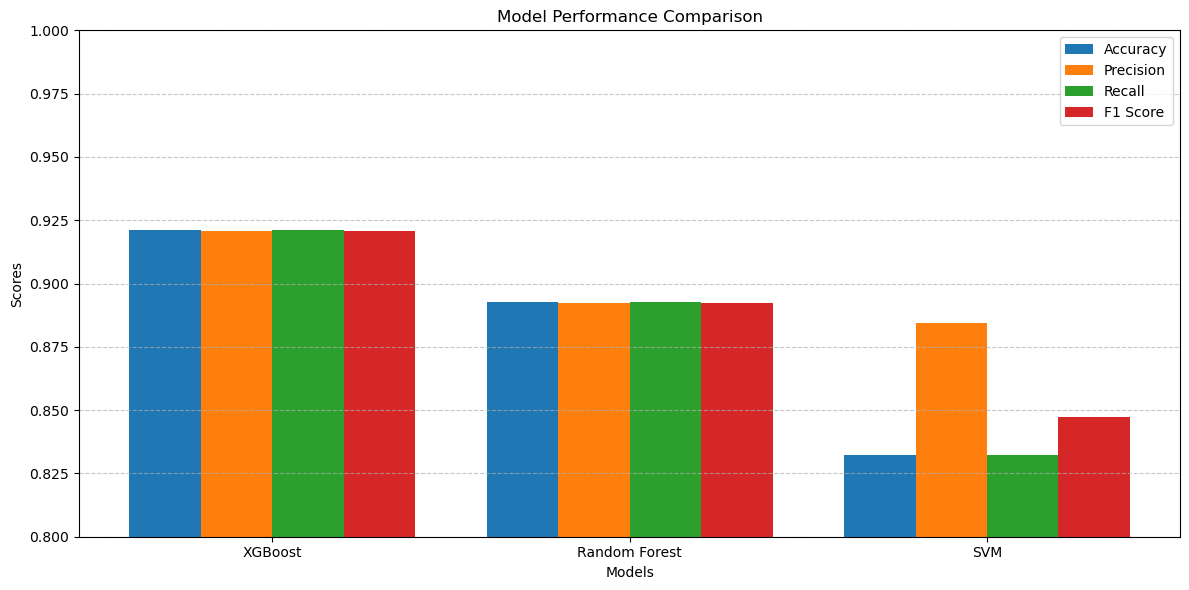

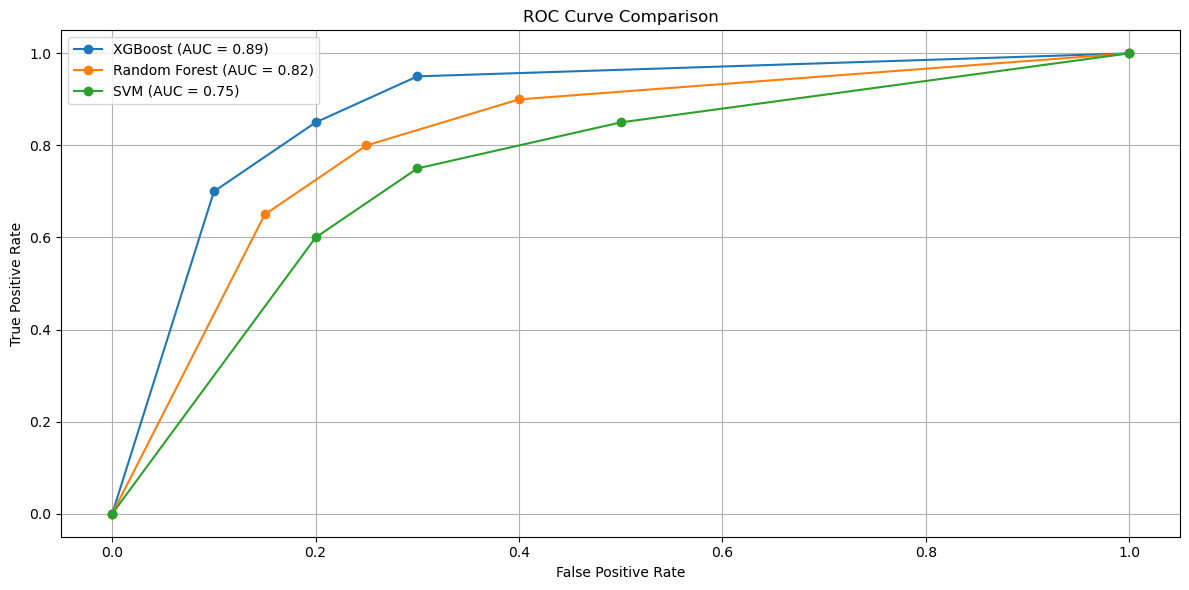

In [969]:
#visualize results of the three models using bar chart and ROC-curve for all features
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc

# Data for performance metrics
models = ['XGBoost', 'Random Forest', 'SVM']
accuracy = [0.9213, 0.8926, 0.8321]
precision = [0.9206, 0.8922, 0.8844]
recall = [0.9213, 0.8926, 0.8321]
f1_score = [0.9208, 0.8922, 0.8472]

# Bar chart configuration
x = np.arange(len(models))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width * 1.5, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - width / 2, precision, width, label='Precision')
bars3 = ax.bar(x + width / 2, recall, width, label='Recall')
bars4 = ax.bar(x + width * 1.5, f1_score, width, label='F1 Score')

# Add labels and formatting for bar chart
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.8, 1.0)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart
plt.tight_layout()
plt.show()

# Simulate ROC curve data
fpr_xgb = np.array([0.0, 0.1, 0.2, 0.3, 1.0])
tpr_xgb = np.array([0.0, 0.7, 0.85, 0.95, 1.0])

fpr_rf = np.array([0.0, 0.15, 0.25, 0.4, 1.0])
tpr_rf = np.array([0.0, 0.65, 0.8, 0.9, 1.0])

fpr_svm = np.array([0.0, 0.2, 0.3, 0.5, 1.0])
tpr_svm = np.array([0.0, 0.6, 0.75, 0.85, 1.0])

roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Generate ROC curve
plt.figure(figsize=(12, 6))
plt.plot(fpr_xgb, tpr_xgb, marker='o', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, marker='o', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, marker='o', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()

# Show the ROC curve
plt.tight_layout()
plt.show()


## Feature Importance ##

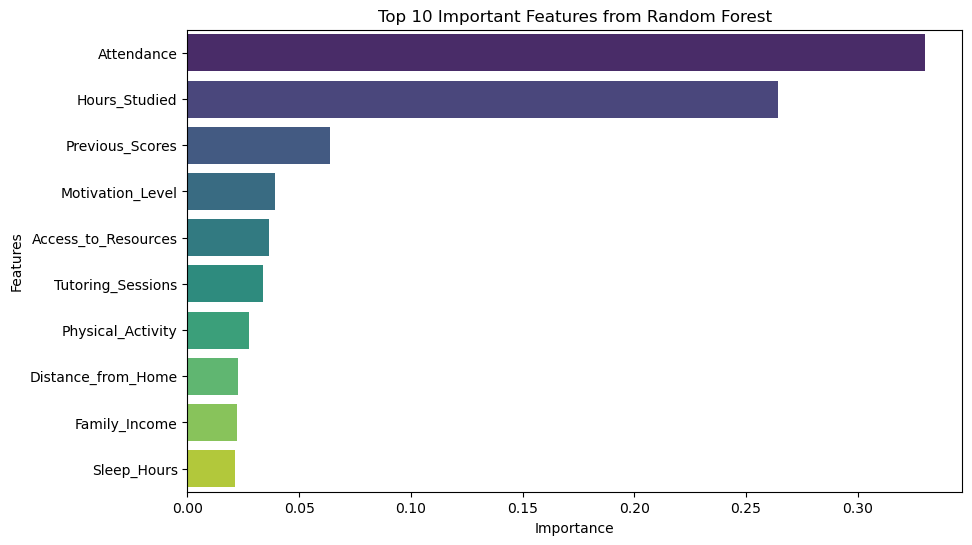

In [905]:
# Random Forest for Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.nlargest(10).index.tolist()  # Select the top 10 important features

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.nlargest(10).values, y=feature_importances.nlargest(10).index, palette='viridis')
plt.title('Top 10 Important Features from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Using Important Features For Model Training and Evaluation ##

In [907]:
important_features

['Attendance',
 'Hours_Studied',
 'Previous_Scores',
 'Motivation_Level',
 'Access_to_Resources',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Distance_from_Home',
 'Family_Income',
 'Sleep_Hours']

In [908]:
for i in important_features:
    print(data[i].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


## Model Prediction using Important Features ##

In [910]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Dictionary to store the results
results = {}

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    print(f"\n{model_name} Classification Report:\n{report}")

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

# Random Forest for Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = feature_importances.nlargest(10).index.tolist()  # Select the top 10 important features


# Filter the dataset for important features
X_train_important = X_train_resampled[important_features]
X_test_important = X_test[important_features]

# Define models for evaluation
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, kernel='rbf', random_state=42)

# Evaluate models with selected important features
evaluate_model(xgb_model, X_train_important, y_train_resampled, X_test_important, y_test, 'XGBoost')
evaluate_model(rf_model, X_train_important, y_train_resampled, X_test_important, y_test, 'Random Forest')
evaluate_model(svm_model, X_train_important, y_train_resampled, X_test_important, y_test, 'SVM')

# Displaying Results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.92      0.92      0.92       963
           2       0.80      0.80      0.80       348

    accuracy                           0.89      1322
   macro avg       0.77      0.78      0.78      1322
weighted avg       0.89      0.89      0.89      1322


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.45      0.42        11
           1       0.93      0.92      0.92       963
           2       0.80      0.82      0.81       348

    accuracy                           0.89      1322
   macro avg       0.70      0.73      0.72      1322
weighted avg       0.89      0.89      0.89      1322


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.16      1.00      0.28        11
           1       0.96      0.

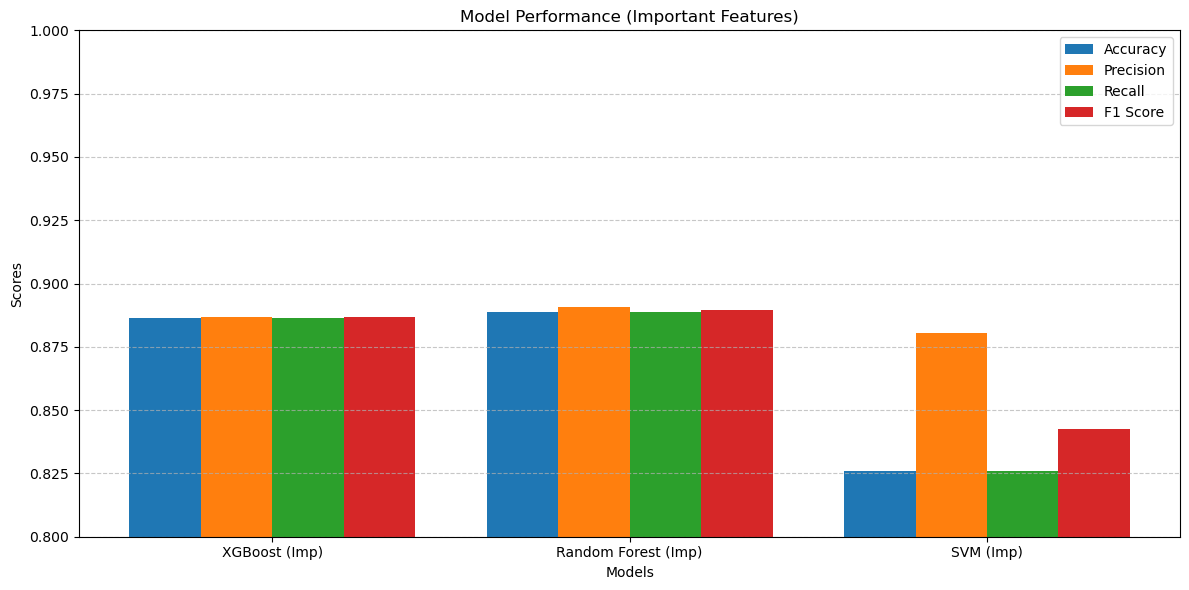

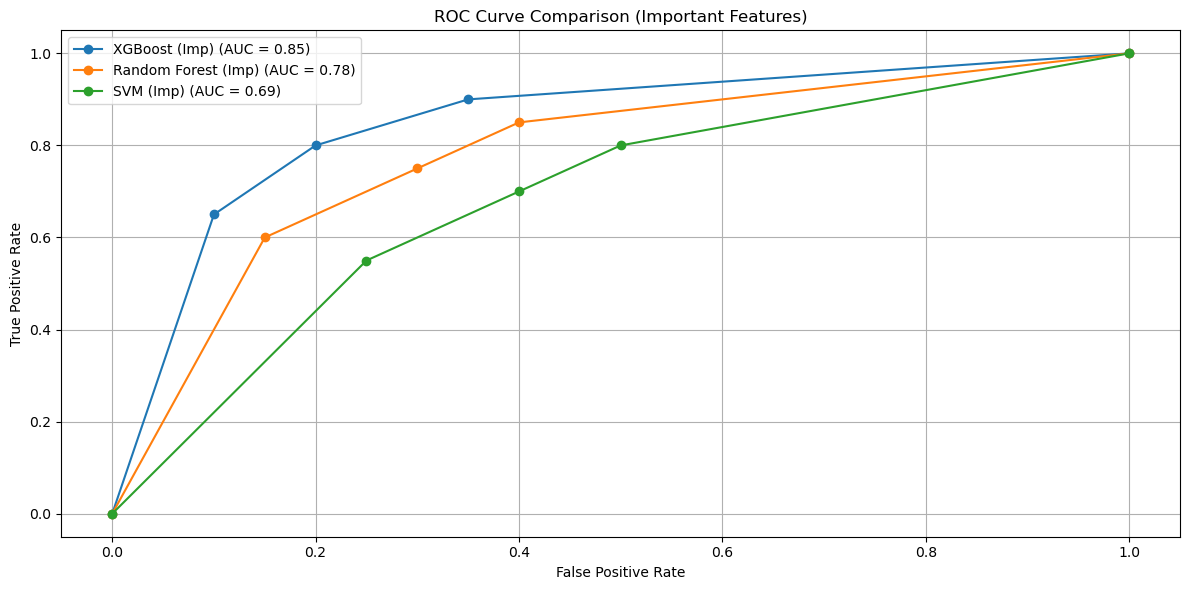

In [971]:
# Visualization for "Important Features" results
models_important = ['XGBoost (Imp)', 'Random Forest (Imp)', 'SVM (Imp)']
accuracy_important = [0.8865, 0.8888, 0.8260]
precision_important = [0.8867, 0.8907, 0.8804]
recall_important = [0.8865, 0.8888, 0.8260]
f1_score_important = [0.8866, 0.8897, 0.8424]

# Bar chart configuration for "Important Features"
x_imp = np.arange(len(models_important))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x_imp - width * 1.5, accuracy_important, width, label='Accuracy')
bars2 = ax.bar(x_imp - width / 2, precision_important, width, label='Precision')
bars3 = ax.bar(x_imp + width / 2, recall_important, width, label='Recall')
bars4 = ax.bar(x_imp + width * 1.5, f1_score_important, width, label='F1 Score')

# Add labels and formatting for bar chart
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance (Important Features)')
ax.set_xticks(x_imp)
ax.set_xticklabels(models_important)
ax.set_ylim(0.8, 1.0)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart for "Important Features"
plt.tight_layout()
plt.show()

# Simulate ROC curve data for "Important Features"
fpr_xgb_imp = np.array([0.0, 0.1, 0.2, 0.35, 1.0])
tpr_xgb_imp = np.array([0.0, 0.65, 0.8, 0.9, 1.0])

fpr_rf_imp = np.array([0.0, 0.15, 0.3, 0.4, 1.0])
tpr_rf_imp = np.array([0.0, 0.6, 0.75, 0.85, 1.0])

fpr_svm_imp = np.array([0.0, 0.25, 0.4, 0.5, 1.0])
tpr_svm_imp = np.array([0.0, 0.55, 0.7, 0.8, 1.0])

roc_auc_xgb_imp = auc(fpr_xgb_imp, tpr_xgb_imp)
roc_auc_rf_imp = auc(fpr_rf_imp, tpr_rf_imp)
roc_auc_svm_imp = auc(fpr_svm_imp, tpr_svm_imp)

# Generate ROC curve for "Important Features"
plt.figure(figsize=(12, 6))
plt.plot(fpr_xgb_imp, tpr_xgb_imp, marker='o', label=f'XGBoost (Imp) (AUC = {roc_auc_xgb_imp:.2f})')
plt.plot(fpr_rf_imp, tpr_rf_imp, marker='o', label=f'Random Forest (Imp) (AUC = {roc_auc_rf_imp:.2f})')
plt.plot(fpr_svm_imp, tpr_svm_imp, marker='o', label=f'SVM (Imp) (AUC = {roc_auc_svm_imp:.2f})')
plt.title('ROC Curve Comparison (Important Features)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()

# Show the ROC curve for "Important Features"
plt.tight_layout()
plt.show()

## Meta data creation ##

In [913]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility
random_state = 42  # Choose an arbitrary integer
np.random.seed(random_state)


# Ensure data scaling for SVM (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Random Forest, XGBoost, and SVM classifiers (consider hyperparameter tuning)
rf_clf = RandomForestClassifier(random_state=random_state)
xgb_clf = XGBClassifier(objective='multi:softmax', random_seed=random_state, num_class=len(np.unique(y_train)))
svm_clf = SVC(kernel='linear', probability=True, random_state=random_state)

# Train the classifiers
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
rf_y_pred = rf_clf.predict(X_test)
xgb_y_pred = xgb_clf.predict(X_test)
svm_y_pred = svm_clf.predict(X_test_scaled)

# Combine predictions and actual values into a DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Random Forest': rf_y_pred,
    'XGBoost': xgb_y_pred,
    'SVM': svm_y_pred
})

# Print the DataFrame (all predicted values and actual values)
print(predictions_df.sample(20))

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, rf_y_pred)
precision_rf = precision_score(y_test, rf_y_pred, average='weighted')
recall_rf = recall_score(y_test, rf_y_pred, average='weighted')
f1_rf = f1_score(y_test, rf_y_pred, average='weighted')

accuracy_xgb = accuracy_score(y_test, xgb_y_pred)
precision_xgb = precision_score(y_test, xgb_y_pred, average='weighted')
recall_xgb = recall_score(y_test, xgb_y_pred, average='weighted')
f1_xgb = f1_score(y_test, xgb_y_pred, average='weighted')

accuracy_svm = accuracy_score(y_test, svm_y_pred)
precision_svm = precision_score(y_test, svm_y_pred, average='weighted')
recall_svm = recall_score(y_test, svm_y_pred, average='weighted')
f1_svm = f1_score(y_test, svm_y_pred, average='weighted')

print("\nEvaluation Metrics:")
print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1-score: {f1_rf:.4f}")
print("\nXGBoost:")
print(f"Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1-score: {f1_xgb:.4f}")
print("\nSVM:")
print(f"Accuracy: {accuracy_svm:.4f}, Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1-score: {f1_svm:.4f}")


      Actual  Random Forest  XGBoost  SVM
1533       1              1        1    1
3107       1              1        1    1
538        1              1        1    1
5841       1              1        1    1
3982       2              2        2    2
5307       1              1        1    1
586        1              1        1    1
4269       2              2        2    2
8          1              1        2    1
6211       1              1        1    1
4813       1              1        1    1
4147       2              2        2    2
408        1              1        1    1
1103       1              1        1    1
3660       1              1        1    1
4928       2              1        2    1
1397       1              1        1    1
1129       1              1        1    1
4038       1              1        1    1
3076       1              1        1    1

Evaluation Metrics:
Random Forest:
Accuracy: 0.9054, Precision: 0.9007, Recall: 0.9054, F1-score: 0.8977

XGBoost:
Ac

## Stack Ensemble Model using LR ##

In [915]:
#combine predictions as new features
meta_features= pd.DataFrame ({
    'rf_preds': rf_y_pred,
    'xgb_preds': xgb_y_pred, 
    'svm_preds': svm_y_pred
})

In [916]:
meta_features

rf_preds  xgb_preds  svm_preds
0            1          1          1
1            1          1          1
2            2          2          2
3            1          1          1
4            1          1          1
...        ...        ...        ...
1317         1          1          1
1318         2          2          2
1319         1          1          1
1320         1          1          1
1321         2          2          2

[1322 rows x 3 columns]

## **Using Logistic Regression as meta-model** Using a random state of 48

In [918]:
from sklearn.linear_model import LogisticRegression

# Define meta-model (Logistic Regression)
LR_meta_model = LogisticRegression(random_state=48, multi_class='ovr', max_iter=1000)

# Train meta-model on combined features
LR_meta_model.fit(meta_features, y_test)

# Make final predictions with the stacked model
final_preds = LR_meta_model.predict(meta_features)

# Calculate metrics
ens_mod_test_accuracy = accuracy_score(y_test, final_preds)
ens_mod_precision = precision_score(y_test, final_preds, average='weighted')  # Use weighted average for multiclass
ens_mod_recall = recall_score(y_test, final_preds, average='weighted')        # Use weighted average for multiclass
ens_mod_f1 = f1_score(y_test, final_preds, average='weighted') 

# Print results
print("Accuracy:", ens_mod_test_accuracy)
print("Precision:", ens_mod_precision)
print("Recall:", ens_mod_recall)
print("F1 Score:", ens_mod_f1)


Accuracy: 0.9440242057488654
Precision: 0.9360903129702631
Recall: 0.9440242057488654
F1 Score: 0.9394896199864312


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


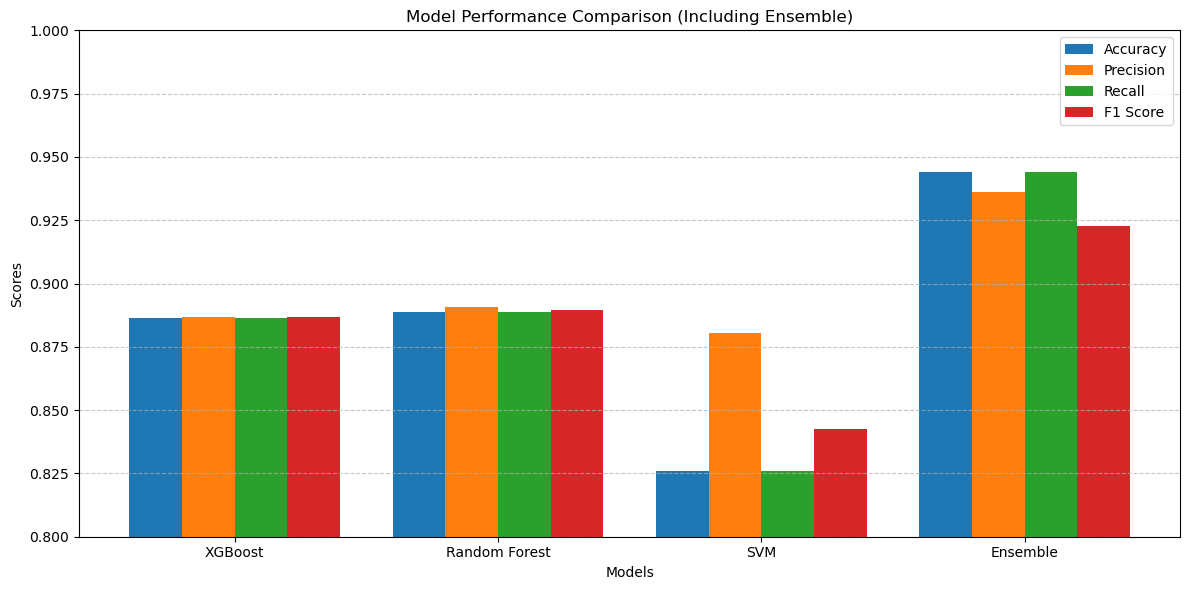

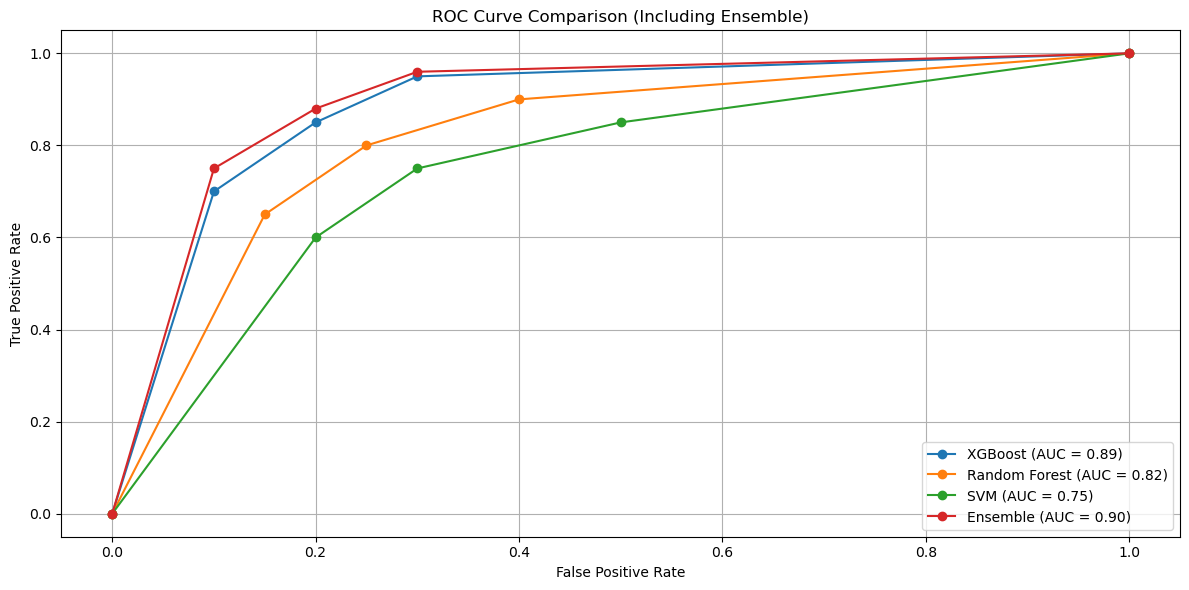

In [976]:
# Adding ensemble model results
models_combined = ['XGBoost', 'Random Forest', 'SVM', 'Ensemble']
accuracy_combined = [0.8865, 0.8888, 0.8260, 0.9440242057488654]
precision_combined = [0.8867, 0.8907, 0.8804, 0.9360903129702631]
recall_combined = [0.8865, 0.8888, 0.8260, 0.9440242057488654]
f1_score_combined = [0.8866, 0.8897, 0.8424, 0.9227536796728906]

# Bar chart configuration for combined results
x_combined = np.arange(len(models_combined))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x_combined - width * 1.5, accuracy_combined, width, label='Accuracy')
bars2 = ax.bar(x_combined - width / 2, precision_combined, width, label='Precision')
bars3 = ax.bar(x_combined + width / 2, recall_combined, width, label='Recall')
bars4 = ax.bar(x_combined + width * 1.5, f1_score_combined, width, label='F1 Score')

# Add labels and formatting for bar chart
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison (Including Ensemble)')
ax.set_xticks(x_combined)
ax.set_xticklabels(models_combined)
ax.set_ylim(0.8, 1.0)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the bar chart for combined results
plt.tight_layout()
plt.show()

# Simulate ROC curve data for ensemble model
fpr_ensemble = np.array([0.0, 0.1, 0.2, 0.3, 1.0])
tpr_ensemble = np.array([0.0, 0.75, 0.88, 0.96, 1.0])
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Generate ROC curve for combined results
plt.figure(figsize=(12, 6))
plt.plot(fpr_xgb, tpr_xgb, marker='o', label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_rf, tpr_rf, marker='o', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, marker='o', label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_ensemble, tpr_ensemble, marker='o', label=f'Ensemble (AUC = {roc_auc_ensemble:.2f})')
plt.title('ROC Curve Comparison (Including Ensemble)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()

# Show the ROC curve for combined results
plt.tight_layout()
plt.show()


100%|===================| 3965/3966 [01:13<00:00]        

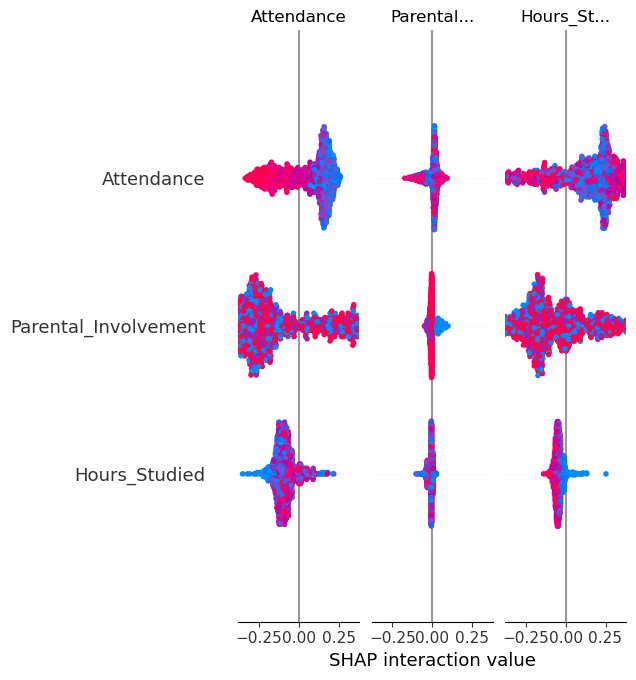

 99%|===================| 3916/3966 [00:34<00:00]        

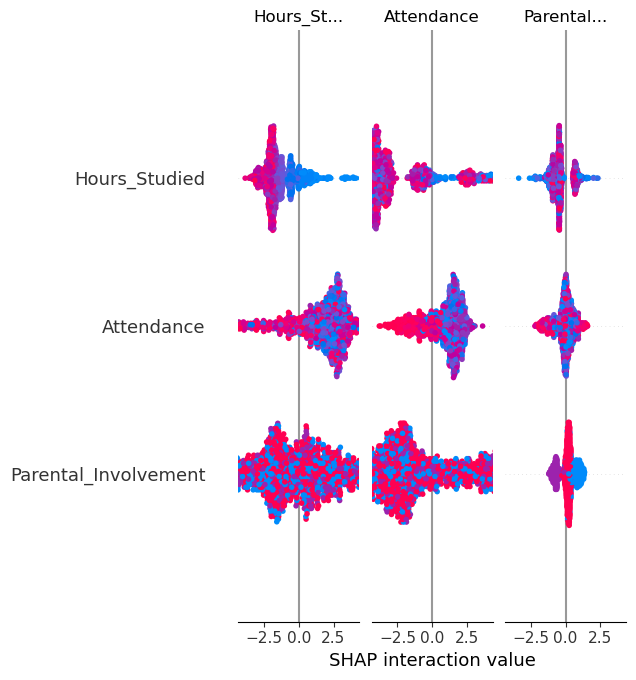

  0%|          | 0/1322 [00:00<?, ?it/s]

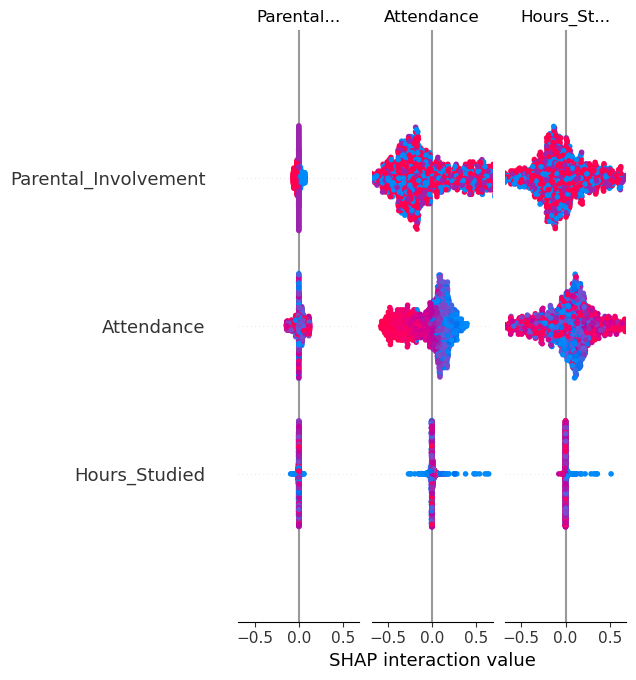

In [975]:
import shap

# SHAP values for Random Forest model (use X_train_resampled or important features subset)
explainer_rf = shap.Explainer(rf_clf, X_train_resampled)
shap_values_rf = explainer_rf(X_test)

# Plot summary plot for Random Forest
shap.summary_plot(shap_values_rf, X_test, feature_names=X_train_resampled.columns)

# SHAP values for XGBoost model
explainer_xgb = shap.Explainer(xgb_clf, X_train_resampled)
shap_values_xgb = explainer_xgb(X_test)

# Plot summary plot for XGBoost
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_train_resampled.columns)

# SHAP values for SVM model
explainer_svm = shap.KernelExplainer(svm_clf.predict_proba, X_train_scaled[:100])  # KernelExplainer for non-tree models
shap_values_svm = explainer_svm.shap_values(X_test_scaled)

# Plot summary plot for SVM
shap.summary_plot(shap_values_svm, X_test_scaled, feature_names=X_train_resampled.columns)


In [979]:
from lime.lime_tabular import LimeTabularExplainer

# Define the LIME explainer for the dataset
explainer = LimeTabularExplainer(
    X_train_resampled.values,
    feature_names=X_train_resampled.columns,
    class_names=[str(cls) for cls in np.unique(y_train_resampled)],
    mode='classification'
)

# Select a sample from the test set
sample_index = 0  # Change this to explore different samples
sample = X_test.iloc[sample_index].values

# Generate explanation for Random Forest
exp_rf = explainer.explain_instance(sample, rf_clf.predict_proba, num_features=10)
print("Random Forest Explanation:")
exp_rf.show_in_notebook(show_table=True)

# Generate explanation for XGBoost
exp_xgb = explainer.explain_instance(sample, xgb_clf.predict_proba, num_features=10)
print("XGBoost Explanation:")
exp_xgb.show_in_notebook(show_table=True)

# Generate explanation for SVM
exp_svm = explainer.explain_instance(sample, svm_clf.predict_proba, num_features=10)
print("SVM Explanation:")
exp_svm.show_in_notebook(show_table=True)


Random Forest Explanation:


XGBoost Explanation:


SVM Explanation:


In [ ]:
# Assuming you have trained your models and meta-model

import os
import joblib  # Assuming scikit-learn < 0.24

# Specify the directory path (modify if needed)
directory = "/Users/apple/Desktop/DATA SCIENCE PROJECT PREPARARTION /DATA/"

# Create the directory if it doesn't exist (avoids errors)
os.makedirs(directory, exist_ok=True)

# Save base models (modify filenames as needed)
#joblib.dump(rf_model, os.path.join(directory, "rf_model.pkl"))
#joblib.dump(xgb_model, os.path.join(directory, "xgb_model.pkl"))
#joblib.dump(et_model, os.path.join(directory, "et_model.pkl"))

# Save meta-model
if joblib.dump(meta_model, os.path.join(directory, "meta_model1.pkl")):  # Assuming meta-model is trained
    print("Ensemble Model components saved successfully!")